In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
df = pd.read_csv("E:\\diabetes_risk_prediction_dataset.csv")

In [5]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [16]:
for x in df.columns:
    if x == 'Age':
        pass
    else:
        print(df[f'{x}'].value_counts())
        
        print('*'*30)

Male      328
Female    192
Name: Gender, dtype: int64
******************************
No     262
Yes    258
Name: Polyuria, dtype: int64
******************************
No     287
Yes    233
Name: Polydipsia, dtype: int64
******************************
No     303
Yes    217
Name: sudden weight loss, dtype: int64
******************************
Yes    305
No     215
Name: weakness, dtype: int64
******************************
No     283
Yes    237
Name: Polyphagia, dtype: int64
******************************
No     404
Yes    116
Name: Genital thrush, dtype: int64
******************************
No     287
Yes    233
Name: visual blurring, dtype: int64
******************************
No     267
Yes    253
Name: Itching, dtype: int64
******************************
No     394
Yes    126
Name: Irritability, dtype: int64
******************************
No     281
Yes    239
Name: delayed healing, dtype: int64
******************************
No     296
Yes    224
Name: partial paresis, dtype: int64

In [25]:
summary_col = pd.DataFrame(df.columns,columns=['column'])

lis_na = []
unique = []
dtype = []

for x in df.columns:
    lis_na.append(df[x].isna().sum())
    unique.append(df[x].nunique())
    dtype.append(df[x].dtype)
    
summary_col['Missing values'] = lis_na
summary_col['Unique values'] = unique
summary_col['Data type'] = dtype
summary_col

,column,Missing values,Unique values,Data type
0,Age,0,51,int64
1,Gender,0,2,object
2,Polyuria,0,2,object
3,Polydipsia,0,2,object
4,sudden weight loss,0,2,object
5,weakness,0,2,object
6,Polyphagia,0,2,object
7,Genital thrush,0,2,object
8,visual blurring,0,2,object
9,Itching,0,2,object


In [26]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [39]:
print('Max age in this is ' + str(df['Age'].max())+',' +  ' Min age in this is '+ str(df['Age'].min()))

Max age in this is 90, Min age in this is 16


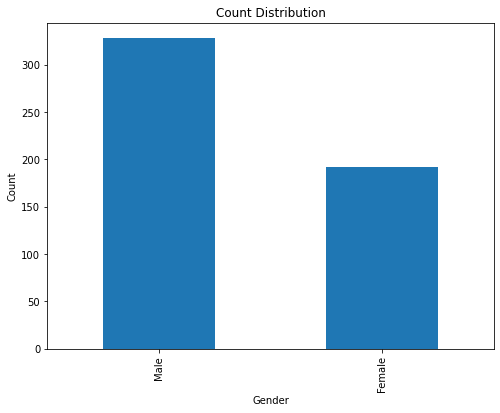

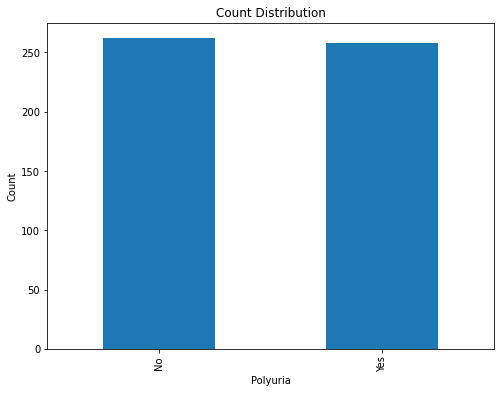

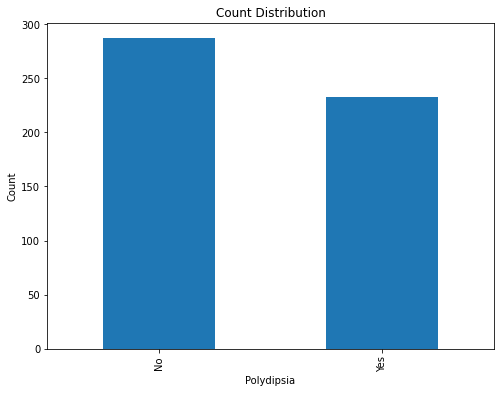

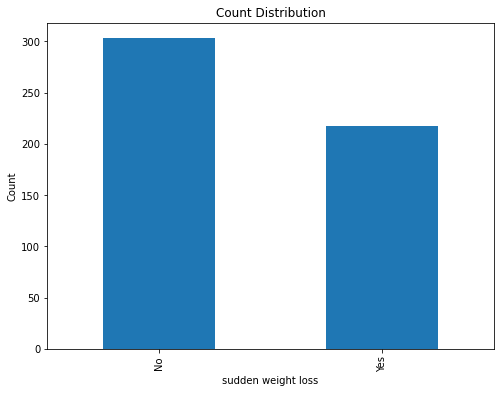

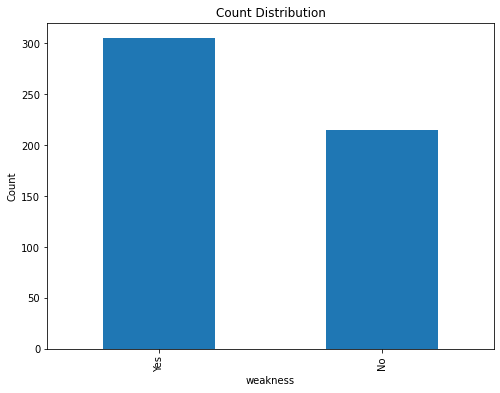

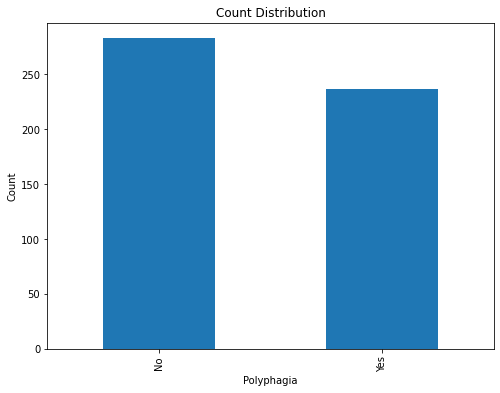

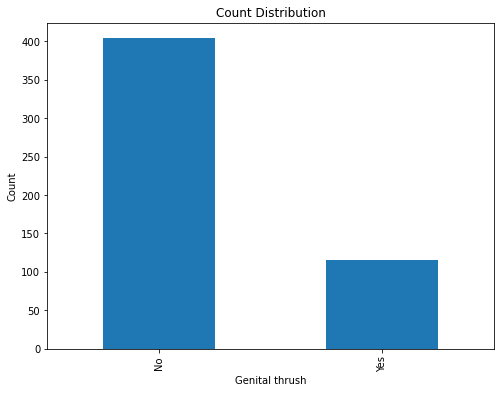

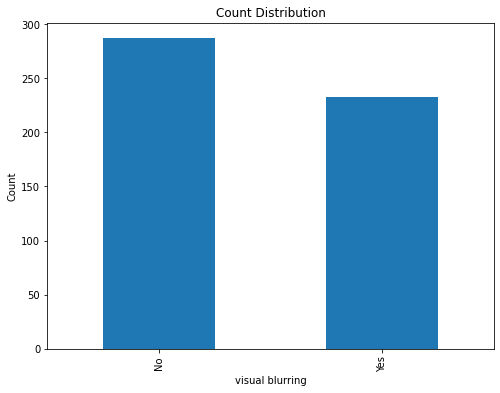

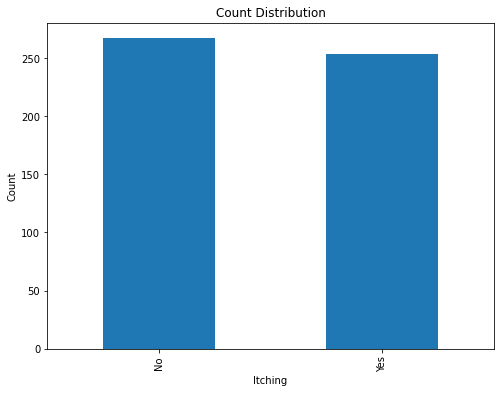

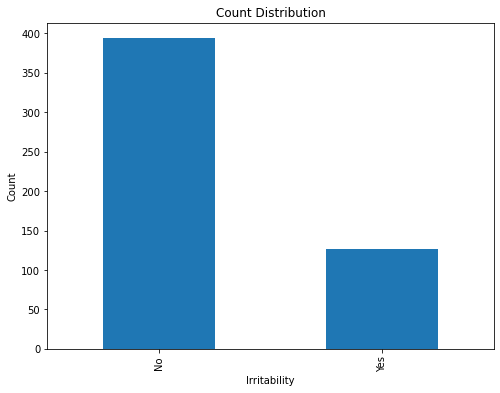

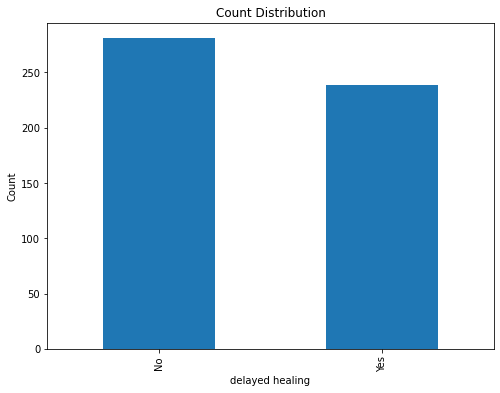

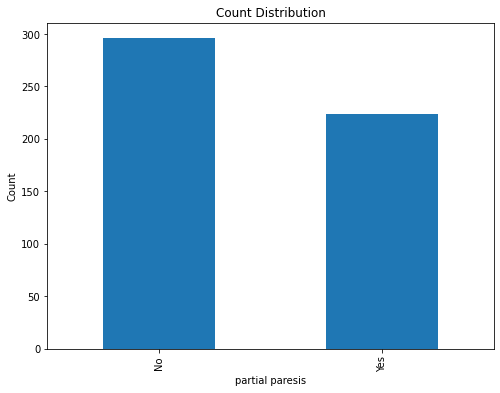

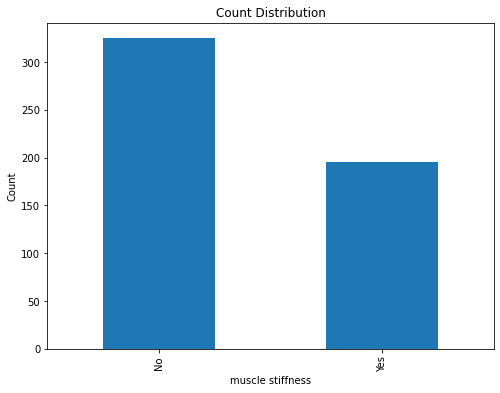

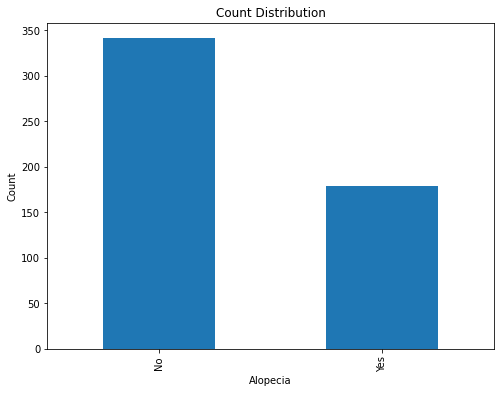

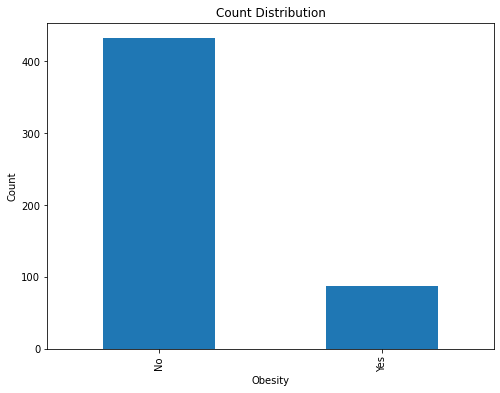

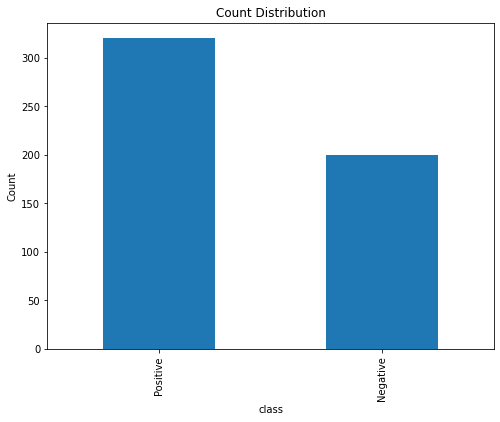

In [61]:
object_columns = df.select_dtypes(include='object')
for x in object_columns.columns:
    count_per_category = df[f'{x}'].value_counts()
    fig, ax = plt.subplots(figsize=(8,6))
    count_per_category.plot(kind='bar')
    plt.title('Count Distribution')
    plt.xlabel(f'{x}')
    plt.ylabel('Count')
    plt.show()

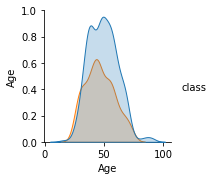

In [73]:
sns.pairplot(df,hue='class')

In [75]:
y = df['class']
X = df.drop('class',axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [78]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
179,35,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,No
322,64,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No
196,66,Male,No,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No
144,68,Male,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No
124,38,Male,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No


In [79]:
X_test.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
422,67,Male,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
107,47,Male,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,No,No
253,43,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes
235,26,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
311,60,Male,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No


In [80]:
x_cat_train = X_train.select_dtypes(include='O')

In [86]:
x_num_train = X_train.select_dtypes(include='int')
x_num_train.head()

,Age
179,35
322,64
196,66
144,68
124,38


In [93]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse=False)
x_cat_ohe = pd.DataFrame(ohe.fit_transform(x_cat_train),columns=ohe.get_feature_names(x_cat_train.columns),index=x_cat_train.index)

In [95]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_num_train = pd.DataFrame(ss.fit_transform(x_num_train),columns=x_num_train.columns,index=x_num_train.index)
x_num_train.head()

,Age
179,-1.108781
322,1.338109
196,1.506860
144,1.675611
124,-0.855654


In [96]:
x_train_con = pd.concat([x_cat_ohe,x_num_train],axis=1)
x_train_con.head()

,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,Age
179,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,-1.108781
322,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.338109
196,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.506860
144,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.675611
124,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.855654


In [102]:
x_test_cat = X_test.select_dtypes(include='O')
x_test_num = X_test.select_dtypes(include = 'int')

x_test_cat_o =  pd.DataFrame(ohe.transform(x_test_cat),columns=ohe.get_feature_names(x_test_cat.columns),index=x_test_cat.index)
x_test_num_s = pd.DataFrame(ss.transform(x_test_num),columns=x_test_num.columns,index=x_test_num.index)


x_test_con = pd.concat([x_test_cat_o,x_test_num_s],axis=1)

In [103]:
x_test_con.head()

,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,Age
422,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.591235
107,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,-0.096275
253,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.433777
235,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.868160
311,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.000607


In [104]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


In [107]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [108]:
from sklearn.model_selection import GridSearchCV

In [110]:
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [122]:
clf.fit(x_train_con,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.36923077 ...        nan 0.91794872 0.91794872]
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [123]:
print(clf.best_estimator_)

LogisticRegression(C=0.0001, penalty='none')


In [124]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)


print('Score on Test Data: ', clf.score(x_test_con, y_test))

Best parameters set found on train set
{'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}
LogisticRegression(C=0.0001, penalty='none')
Score on Test Data:  0.9384615384615385


In [129]:
from sklearn import metrics

y_test_pred = clf.predict(x_test_con)

metrics.accuracy_score(y_test, y_test)


output_df = pd.DataFrame({'Actual':y_test})


output_df["predicted"] = y_test_pred

output_df.head()


,Actual,predicted
422,Positive,Positive
107,Positive,Positive
253,Positive,Positive
235,Negative,Negative
311,Negative,Negative
